<a href="https://colab.research.google.com/github/Hongjieun123/deeplearning-project/blob/master/%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_%EC%9E%84%EB%B2%A0%EB%94%A9(%ED%95%9C%EA%B8%80%EB%84%A4%EC%9D%B4%EB%B2%84)_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1==0.7.4
!pip install rhinoMorph

In [64]:
# 학습할 텍스트 읽기 
import re
from nltk.tokenize import word_tokenize, sent_tokenize  #word_tokenize 안쓴대 안써도된대 
import os.path
from gensim.models import Word2Vec
import rhinoMorph

embedding_dim = 200                                    # 임베딩 차원수 설정 (200차원)

originalpath = os.getcwd()                             # 현재 경로 파악
filepath = '/content/gdrive/My Drive/pytest/'
os.chdir(filepath)                                     # 경로 설정
print("Current Directory:", os.getcwd())

f = open('ratings_small.txt', 'r', encoding='cp949')    # 테스트용 파일을 학습 파일로 읽음  ratings_small.txt 얘가지고 word2vec만든대
content_text = f.read()
content_text = re.sub(r'\([^)]*\)', '', content_text)  # 괄호로 구성된 내용(예: (Audio))을 제거하는 코드 꼭 안해도된대  ()안의 내용이 문맥과 안맞아서 지웠대 

Current Directory: /content/gdrive/My Drive/pytest


In [0]:
print(content_text)

In [66]:
# 텍스트의 형태소 분석 , 시간이 좀 걸림 (result.append에서 시간이 좀 늘어난다. result를 만들고, 문장 분석되면 하나 채우고, 채우고 해서 첨에는 []였다가 하나 들어오고, append해서 [1,2] 집어넣고, [1,2,3] 되고 앞에거 복사해서 새로운거 집어넣으니까 [1,2,3,4,...10000,..]늘어날 수록 시간 오래걸림)
import nltk
nltk.download('punkt')

sent_text=sent_tokenize(content_text)       # 문장 단위 분리 (문맥을 읽는거니까)
rn = rhinoMorph.startRhino()                # RHINO 기동

print('type:', type(sent_text))              
print('length:', len(sent_text))            # 전체 문장의 개수
print('sentence sample:', sent_text[:20])   # 형태소 분석 전 모습 

cnt = 0 ; result=[]
for sentence in sent_text:
    result.append(rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False))
    cnt += 1
    if (cnt%1000) == 0:                     # 진행정도 확인을 위해 1000번째 문장마다 확인
        print(cnt)
        
print('result length:', len(result))        # 형태소 분석 후 문장의 개수 (sample이라 수가좀 적다.)
print('result sample', result[:20])         # 형태소 분석 후 모습 (중첩으로 들어감)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
type: <class 'list'>
length: 288
sentence sample: ['id\tdocument\tlabel\n8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n8132799\t"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데.', '사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1\n4655635\t폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1\n9251303\t와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지\t1\n10067386\t안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.', '1\n2190435\t사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화\t1\n9279041\t완전 감동입니다 다시봐도 감동\t1\n7865729\t개들의 전쟁2 나오나요?', '나오면 1빠로 보고 싶음\t1\n7477618\t굿\t1\n9250537\t바보가 아니라 병 쉰 인듯\t1\n9730759\t내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...\t1\n640794\t재밌다\t1\n9537008\t고질라니무 귀엽다능ㅋㅋ\t1\n4911311\t영화의 

In [67]:
# 임베딩 구성 
os.chdir(filepath+'word2vec/') #pytest 폴더에 word2vec 폴더 안에 넣고 싶다. 

model = Word2Vec(sentences=result, size=embedding_dim, window=10, min_count=5, workers=4, sg=1)  #min_count 단어의 최소 빈도 (min_count=3가 가장 좋대) , workers=4 , sg=1 (skip-gram쓸거냐 말거냐)
model.save('test_embedding.model')  #저장하는 파일 이름

print('Completed.') #다끝나면 completed 이다. 


Completed.


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# 임베딩 값 저장 
words = list(model.wv.vocab)
with open('test_embedding.txt', 'w') as f:
    for word in words: #단어 하나씩 뽑아 가져오기
        data = model.wv[word].tolist()      # 현재 단어의 임베딩 값을 가져온다
        print('data_pre:', data)            # 현재 단어의 임베딩 값을 출력해본다

        data.insert(0, word)                # 시작 부분에 해당 단어를 넣는다
        print('data_after:', data)          # 시작 부분에 단어의 이름이 있는 현재 단어의 임베딩 값을 출력해본다(단어이름 + 임베딩 값 같이 출력)

        for item in data:                   # 단어 이름부터 시작하여 각 벡터의 값을 저장한다
            f.write("%s " % item) #공백 하나씩 두고 한다.
        f.write("\n")

In [69]:
# 유사어 찾기
model = Word2Vec.load('wikiNcorpus_eomiNo.model') #호출할 때는 이 파일 하나만 가져와도됌 , 미리 만들어진 워드 임베딩 사용 (우리가 만든거는 sample파일 이니까 성능이 좋지 x)

print('--- 유사단어 출력 ---')
similarWords = model.most_similar(positive=['행복', '웃음', '밝', '기쁘', '즐겁'], topn=5)  #행복, 웃음, 밝과 유사한 형태소 5개 출력
print(similarWords)
print(similarWords[0][0], similarWords[1][0])

word = []
for similarWord in similarWords:
    word.append(similarWord[0])

print(word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


--- 유사단어 출력 ---
[('흐뭇', 0.7614479064941406), ('기쁨', 0.7515653967857361), ('유쾌', 0.7144991755485535), ('슬프', 0.7131645679473877), ('즐거움', 0.6979403495788574)]
흐뭇 기쁨
['흐뭇', '기쁨', '유쾌', '슬프', '즐거움']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [70]:
# 유사어 찾기
model = Word2Vec.load('wikiNcorpus_eomiNo.model') #호출할 때는 이 파일 하나만 가져와도됌 , 미리 만들어진 워드 임베딩 사용 (우리가 만든거는 sample파일 이니까 성능이 좋지 x)

print('--- 유사단어 출력 ---')
similarWords = model.most_similar(negative=['행복', '웃음', '밝', '기쁘', '즐겁'], topn=5)  #행복, 웃음, 밝과 유사한 형태소 5개 출력(반의어는 잘 안된다)
print(similarWords)
print(similarWords[0][0], similarWords[1][0])

word = []
for similarWord in similarWords:
    word.append(similarWord[0])

print(word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


--- 유사단어 출력 ---
[('하부', 0.07457725703716278), ('반출', 0.05167870968580246), ('가반', 0.04674831032752991), ('지정하', 0.04583063721656799), ('반관', 0.04169628769159317)]
하부 반출
['하부', '반출', '가반', '지정하', '반관']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [71]:
# 유사어 찾기
model = Word2Vec.load('wikiNcorpus_eomiNo.model') #호출할 때는 이 파일 하나만 가져와도됌 , 미리 만들어진 워드 임베딩 사용 (우리가 만든거는 sample파일 이니까 성능이 좋지 x)

print('--- 유사단어 출력 ---')
similarWords = model.most_similar(positive=['서울', '한국', '광화문', '코리아'], topn=5)  #행복, 웃음, 밝과 유사한 형태소 5개 출력(반의어는 잘 안된다)
print(similarWords)
print(similarWords[0][0], similarWords[1][0])

word = []
for similarWord in similarWords:
    word.append(similarWord[0])

print(word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


--- 유사단어 출력 ---
[('동숭아트홀', 0.6627147793769836), ('한국조직위원회', 0.6542152762413025), ('코리아나호텔', 0.6503006219863892), ('크라운호텔', 0.6496912240982056), ('개설식', 0.6413506865501404)]
동숭아트홀 한국조직위원회
['동숭아트홀', '한국조직위원회', '코리아나호텔', '크라운호텔', '개설식']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# 한글 네이버 다중분류

In [0]:
# 경로 설정
naver_dir = '/content/gdrive/My Drive/pytest/네이버뉴스-생활문화_다중/' #케라스 임베딩 사용가능(단순하게 만든다, 성능 높이는데 도움 준다)

In [0]:
# Data Loading Preparation
import os
#train의 양이 적어 성능이 좋지는 않다.
train_dir = os.path.join(naver_dir, 'train')
test_dir = os.path.join(naver_dir, 'test')

label_types = ['건강정보', '공연전시', '도로교통', '여행레저', '음식맛집', '자동차시승기', '종교', '책', '패션뷰티']

In [0]:
# text와 labels 리스트를 만드는 함수를 작성한다
def make_texts_labels(dir, label_types, encode='utf8'):    	# texts와 labels 리스트를 만드는 함수
  texts = []
  labels = []
  
  for label_type in label_types:
    dir_name = os.path.join(dir, label_type) 		  # 각각의 label 폴더에 접근한다
    for fname in os.listdir(dir_name):
      if fname[-4:] == '.txt':                    # 마지막 4 글자가 .txt 로 끝나는지를 확인한다
        f = open(os.path.join(dir_name, fname), encoding=encode)
        texts.append(f.read())                    # 텍스트를 읽어서 texts 리스트에 연결한다
        f.close()
        
        if label_type == label_types[0]:          # 만약 현재 폴더가 '건강정보' 폴더라면
          labels.append(0)                        # texts와 같은 순서의 labels 리스트에는 0을 저장한다
        elif label_type == label_types[1]:
          labels.append(1)
        elif label_type == label_types[2]:
          labels.append(2)
        elif label_type == label_types[3]:
          labels.append(3)
        elif label_type == label_types[4]:
          labels.append(4)
        elif label_type == label_types[5]:
          labels.append(5)
        elif label_type == label_types[6]:
          labels.append(6)
        elif label_type == label_types[7]:
          labels.append(7)
        elif label_type == label_types[8]:
          labels.append(8)
          
  return texts, labels

In [75]:
# Train Data Loading
# 훈련 데이터의 텍스트와 라벨을 받아온다

texts, labels = make_texts_labels(train_dir, label_types)

print('texts 0:', texts[0])  #건강정보
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: 자궁적출수술이 여성에게 미치는 영향 : 네이버 뉴스







최근 미국에서 발표된 대규모 연구결과 자궁적출술을 받은 여성일수록 심혈관질환에 노출될 확률이 높은 것으로 보고됐다.“가족계획을 다 마치셨다면 자궁적출술로 문제를 해결하시죠.”주부 박모 씨(43)가 최근 자궁근종으로 진단받은 뒤 들은 이야기다. 더 이상 아이를 가질 생각도 없지만 막상 자궁을 제거한다니 마음이 싱숭생숭하다. 의사에게 다른 치료법은 없냐고 물었지만 ‘가장 확실한 치료법’이라며 자궁적출수술을 추천했다.한국은 OECD 국가 중 자궁적출술 건수가 가장 많은 나라다. 부인과 암과 관련된 경우 자궁적출술이 꼭 필요하지만, 근종 때문이라면 문제가 다르다. 자궁근종은 암으로 악화될 가능성이 낮은 양성종양이다. 월경과다·생리통 등을 유발할 수 있지만 생명에 직접적인 영향을 주지 않는다.민트병원 자궁근종통합센터 김재욱 원장은 “과거 임신계획이 없는 여성에서 자궁근종·자궁선근증이 나타난 경우 자궁적출술을 권유하곤 했다”며 “근종의 위치나 수에 따라 다르지만 자궁적출술은 자궁을 보존하는 자궁절제술보다 쉽고, 임신·출산의 기능을 마친 자궁은 중요한 기능이 없다고 믿었기 때문”이라고 설명했다.실제로 자궁적출수술 후에는 근종이 자랄 자궁이 없으니 재발하는 경우는 없다. 수술 시 난소는 남겨두기 때문에 여성호르몬 분비도 큰 문제가 없다. 다만 최근엔 의학기술이 발달하며 자궁보존적 치료방법이 많이 개발돼 굳이 이 치료법만을 적용할 이유가 없다는 것이 학계 의견이다. 또 수술 후 후유증이 높은 빈도로 나타날 수 있어 신중히 결정해야 한다. 근종의 씨앗을 뽑는 대신 다른 건강엔 문제가 생길 수 있다는 것. 김재욱 원장의 도움말로 자궁적출술이 여성의 몸에 일으킬 수 있는 변화를 알아본다.■ 수술 후 젊은 여성일수록 심혈관질환 증가최근 미국에서 발표된 대규모 연구결과 자궁적출술을 받은 여성일수록 심혈관질환에 노출될 확률이 높은 것으로 보고됐다. 이는 북미 폐경학회 공식학회지(Menopause) 2018년

In [76]:
# Analyzing Morphology
# 한글은 tokenizing을 위해서 먼저 형태소분석을 해야 한다
import rhinoMorph
rn = rhinoMorph.startRhino()                         		

# 리스트 컴프리헨션으로 실질형태소만을 리스트로 가져온다
texts = [rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in texts]

print(texts)
print(texts[0])

filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
[['자궁', '적출', '수술', '여성', '미치', '영향', '네이버', '뉴스', '최근', '미국', '발표', '되', '규모', '연구', '결', '자궁', '적출술', '받', '여성', '록', '심혈관', '질환', '노출', '되', '확률', '높', '보', '되', '가족', '계획', '다', '마치', '자궁', '적출술', '문제', '해결', '하', '주부', '박', '모', '가', '최근', '자궁', '근종', '진단', '받', '뒤', '들', '이야기', '더', '이상', '아이', '가지', '생각', '없', '막상', '자궁', '제거', '하', '마음', '싱숭생숭', '하', '의사', '다른', '치료법', '없', '묻', '가장', '확실', '치료법', '자궁', '적출', '수술', '추천', '한국', '국가', '자궁', '적출술', '건수', '가장', '많', '나라', '부인', '암', '관련', '되', '경우', '자궁', '적출술', '꼭', '필요', '하', '근종', '문제', '다르', '자궁', '근종', '암', '악화', '되', '가능', '낮', '양성', '종양', '월경', '과', '생리', '통', '유발', '하', '생명', '직접', '영향', '주', '민트', '병원', '자궁', '근종', '통합', '센터', '김재욱', '원장', '과거', '임신', '계획', '없', '여성', '자궁', '근종', '자궁', '선', '근', '증', '나타나', '경우', '자궁', '적출술', '권유', '하', '근종', '위치', '수', '따르', '

In [0]:
# Data Tokenizing
%tensorflow_version 2.x
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

validation_ratio = math.floor(len(texts) * 0.3)    	# 30%는 검증데이터로 사용한다. 나머지는 훈련데이터
max_words = 10000                                   # 데이터셋에서 가장 빈도 높은 10,000 개의 단어만 사용한다
maxlen = 200                                        # 200개 이후의 단어는 버린다
class_number = 9                                    # 분류할 클래스의 수

tokenizer = Tokenizer(num_words=max_words)  	      # 상위빈도 10,000 개의 단어만을 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(texts)                       # 단어 인덱스를 구축한다
word_index = tokenizer.word_index               	  # 단어 인덱스만 가져온다

In [78]:
print(word_index)

{'하': 1, '되': 2, '뉴스': 3, '네이버': 4, '및': 5, '이': 6, '기자': 7, '한국': 8, '가': 9, '그': 10, '김': 11, '위하': 12, '보': 13, '서울': 14, '받': 15, '주': 16, '배포': 17, '무단': 18, '전재': 19, '대하': 20, '제공': 21, '금지': 22, '설': 23, '고객': 24, '제품': 25, '통하': 26, '올림픽': 27, '에': 28, '평창': 29, '등': 30, '바로': 31, '시장': 32, '작품': 33, '수': 34, '대표': 35, '제보': 36, '자궁': 37, '들': 38, '없': 39, '스포츠서울': 40, '발생': 41, '또': 42, '밝히': 43, '서비스': 44, '이상': 45, '다양': 46, '작가': 47, '사진': 48, '계획': 49, '가장': 50, '사람': 51, '약': 52, '때': 53, '정부': 54, '진행': 55, '사회': 56, '교통': 57, '책': 58, '관련': 59, '시': 60, '사업': 61, '말하': 62, '오': 63, '경제': 64, '한경': 65, '컬러': 66, '따르': 67, '경우': 68, '나': 69, '지역': 70, '교수': 71, '이번': 72, '속': 73, '가격': 74, '여성': 75, '크': 76, '공식': 77, '해외': 78, '지난해': 79, '연휴': 80, '말': 81, '공연': 82, '도로': 83, '차': 84, '함께': 85, '지원': 86, '핑크': 87, '국가': 88, '안전': 89, '채널': 90, '와': 91, '차량': 92, '소설': 93, '문제': 94, '티': 95, '사량': 96, '연구': 97, '많': 98, '기간': 99, '두': 100, '만들': 101, '녹': 102, '항공': 103,

In [79]:
# 전체 데이터가 가지고 있는 토큰의 수를 보여준다. texts_to_sequences()를 거쳐야 10,000개만 남는다. 

print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ', word_index)

전체에서 5165개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'하': 1, '되': 2, '뉴스': 3, '네이버': 4, '및': 5, '이': 6, '기자': 7, '한국': 8, '가': 9, '그': 10, '김': 11, '위하': 12, '보': 13, '서울': 14, '받': 15, '주': 16, '배포': 17, '무단': 18, '전재': 19, '대하': 20, '제공': 21, '금지': 22, '설': 23, '고객': 24, '제품': 25, '통하': 26, '올림픽': 27, '에': 28, '평창': 29, '등': 30, '바로': 31, '시장': 32, '작품': 33, '수': 34, '대표': 35, '제보': 36, '자궁': 37, '들': 38, '없': 39, '스포츠서울': 40, '발생': 41, '또': 42, '밝히': 43, '서비스': 44, '이상': 45, '다양': 46, '작가': 47, '사진': 48, '계획': 49, '가장': 50, '사람': 51, '약': 52, '때': 53, '정부': 54, '진행': 55, '사회': 56, '교통': 57, '책': 58, '관련': 59, '시': 60, '사업': 61, '말하': 62, '오': 63, '경제': 64, '한경': 65, '컬러': 66, '따르': 67, '경우': 68, '나': 69, '지역': 70, '교수': 71, '이번': 72, '속': 73, '가격': 74, '여성': 75, '크': 76, '공식': 77, '해외': 78, '지난해': 79, '연휴': 80, '말': 81, '공연': 82, '도로': 83, '차': 84, '함께': 85, '지원': 86, '핑크': 87, '국가': 88, '안전': 89, '채널': 90, '와': 91, '차량': 92, '소설': 93, '문제': 94, '티': 95, '사량': 9

In [80]:
# Data Sequencing
# train 데이터를 Sequencing 한다
# 상위 빈도 10,000개의 단어를 word_index의 숫자 리스트로 변환. Tokenizer 결과가 여기서 반영된다
data = tokenizer.texts_to_sequences(texts) 

# maxlen의 수만큼으로 2D 텐서를 만든다(padding 거친다)
data = pad_sequences(data, maxlen=maxlen)

print('data:', data)

data: [[ 477  476    1 ...    5   17   22]
 [   0    0    0 ...    9   11  543]
 [   0    0    0 ...    3   31    9]
 ...
 [1876    1  612 ...    5   17   22]
 [ 183 1110   95 ...    5   17   22]
 [5146 2554 1037 ...    5   17   22]]


In [0]:
# One-Hot Encoding
# 원-핫 인코딩 함수 
def to_one_hot(labels, dimension):
      results = np.zeros((len(labels), dimension))
      for i, label in enumerate(labels):
         results[i, label] = 1.
      return results


# 입력층에는 원-핫 인코딩을 수행하지 않는다
# data = to_one_hot(data, dimension=max_words)

# 출력층만 원-핫 인코딩을 수행한다 
labels = to_one_hot(labels, dimension=class_number)  

In [0]:
print(labels)

In [82]:
# Train data와 Validation data 준비

print('데이터 텐서의 크기:', data.shape)        	# (90, 10000)
print('레이블 텐서의 크기:', labels.shape)      	# (90, 9) data와 label이 모두 2D 텐서가 되었음

indices = np.arange(data.shape[0])      		      # 0 ~ 89 까지의 숫자를 생성
np.random.shuffle(indices)                        # 0 ~ 89 까지의 숫자를 랜덤하게 섞음
data = data[indices]                              # 이것을 인덱스로 하여 2D 텐서 데이터를 섞음
labels = labels[indices]                          # label도 같은 순서로 섞음

x_train = data[validation_ratio:]                 # 훈련데이터의 70%를 훈련데이터
y_train = labels[validation_ratio:]               # 훈련데이터의 70%를 훈련데이터 Label
x_val = data[:validation_ratio]                   # 훈련데이터의 30%를 검증데이터
y_val = labels[:validation_ratio]                 # 훈련데이터의 30%를 검증데이터 Label

데이터 텐서의 크기: (90, 200)
레이블 텐서의 크기: (90, 9)


In [83]:
# 모델 정의하기 - Word2Vec Embedding (1)
# 단어와 임베딩 값의  딕셔너리 생성
embeddings_index = {} #단어 하나가 200개의 차원으로 되어 있는것 
f = open(os.path.join(filepath+'word2vec', 'word2vec_embedding.txt'), encoding='cp949')
for line in f:
    values = line.split()  #각 줄 분리
    word = values[0]                                  # 각 행의 단어
    coefs = np.asarray(values[1:], dtype='float32')   # 각 단어의 임베딩값 (1~마지막까지는 벡터)
    embeddings_index[word] = coefs #현재의 워드에 대한 임베딩 값
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

142161개의 단어 벡터를 찾았습니다.


In [0]:
# 모델 정의하기 - Word2Vec Embedding (2)
# 임베딩 행렬 구성
embedding_matrix = np.zeros((max_words, embedding_dim))     # 0으로 채워진 빈 행렬 구성
for word, i in word_index.items():
    if i < max_words:                                       # max_words 이하의 범위에서 순회
        embedding_vector = embeddings_index.get(word)       # 해당 단어의 임베딩 벡터를 가져온다 
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector          # 임베딩 값을 해당 행렬 위치에 주입한다
            #벡터 값으로 만들어 준다.

모델의 뼈대 만들기

In [0]:
# 모델 정의하기 - Word2Vec Embedding (3)
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()                 		# 모델을 새로 정의

# 임베딩 층. 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 input_length(=maxlen)를 지정. 출력층은 (input_dim, input_length, output_dim)가 됨
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))  #input_dim 10000개의 행, output_dim 200 벡터,  input_length=flatten할 때 필요(여기 층에서 미리 준비가 되어야 flatten될 수 있대)
model.add(layers.Flatten())                     # 3D 임베딩 텐서를 (input_dim, input_length * output_dim) 크기의 2D 텐서로 펼친다

# 은닉층
model.add(layers.Dense(units=32, activation='relu'))

# 출력층. 출력 노드는 분류 개수인 9. 활성화 함수는 sigmoid와 성격이 같으나 다중분류에 사용되는 함수인 softmax 함수를 사용한다. 확률값을 출력
model.add(layers.Dense(units=class_number, activation='softmax'))

In [0]:
# 모델 정의하기 - Word2Vec Embedding (4)
model.layers[0].set_weights([embedding_matrix]) #[0] 임베딩 층 , 여기다가 가중치를 넣어라
model.layers[0].trainable = False  #동결시켜버림 (훈련단계에서 임베딩 건들지 않는다.)

In [0]:
# 모델 정의하기
# 보다 쉽게 사용할 수 있는 Keras Embedding으로 진행 (유사어 구분 기능은 없다. 가중치는 랜덤하게 설정하고, 훈련과정속에서도 값이 계속 변함, 동결되지 않음. 유사기능은 없지만 밀집벡터를 쓴다.(원핫인코딩 = 희소벡터), 밀집벡터가 확률이 더 높다)

from tensorflow.keras import models
from tensorflow.keras import layers

embedding_dim = 50                              # 임베딩의 차원을 설정한다. 보통 200까지에서 적절히 설정한다. (여기서는 50차원, 차원이 고정되어있다.) 
model = models.Sequential()                 		# 모델을 새로 정의

# 임베딩 층. 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 input_length(=maxlen)를 지정. 출력층은 (input_dim, input_length, output_dim)가 됨
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())                     # 3D 임베딩 텐서를 (input_dim, input_length * output_dim) 크기의 2D 텐서로 펼친다

# 은닉층
model.add(layers.Dense(units=32, activation='relu'))

# 출력층. 출력 노드는 분류 개수인 9. 활성화 함수는 sigmoid와 성격이 같으나 다중분류에 사용되는 함수인 softmax 함수를 사용한다. 확률값을 출력
model.add(layers.Dense(units=class_number, activation='softmax'))

In [88]:
# 모델 요약 출력
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 297       
Total params: 820,329
Trainable params: 820,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile Model
# 신경망의 출력이 확률이므로 오차값 계산은 crossentropy를 사용하는 것이 최선이다
# 가중치 업데이트는 이동평균 방법인 RMSprop을 사용하였다. (adam도 사용가능)
# crossentropy는 원본의 확률 분포와 예측의 확률 분포를 측정하여 조절해 간다
# 또한 다중 분류이므로 categorical_crossentropy를 사용한다

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [90]:
# Train Model
# 32개씩 미니 배치를 만들어 10번의 epoch로 훈련
# 훈련데이터로 훈련하고, 검증데이터로 검증한다
# 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

history_dict = history.history

Epoch 1/10
2/2 [==============================] - 0s 66ms/step - loss: 2.1898 - acc: 0.1905 - val_loss: 2.1888 - val_acc: 0.1111
Epoch 2/10
2/2 [==============================] - 0s 28ms/step - loss: 1.8359 - acc: 0.8254 - val_loss: 2.1781 - val_acc: 0.1111
Epoch 3/10
2/2 [==============================] - 0s 22ms/step - loss: 1.4749 - acc: 0.9048 - val_loss: 2.1692 - val_acc: 0.1481
Epoch 4/10
2/2 [==============================] - 0s 21ms/step - loss: 1.1168 - acc: 0.9683 - val_loss: 2.1855 - val_acc: 0.1481
Epoch 5/10
2/2 [==============================] - 0s 20ms/step - loss: 0.8096 - acc: 0.9841 - val_loss: 2.2217 - val_acc: 0.1852
Epoch 6/10
2/2 [==============================] - 0s 21ms/step - loss: 0.5836 - acc: 0.9841 - val_loss: 2.2696 - val_acc: 0.2222
Epoch 7/10
2/2 [==============================] - 0s 23ms/step - loss: 0.3992 - acc: 0.9841 - val_loss: 2.2428 - val_acc: 0.2593
Epoch 8/10
2/2 [==============================] - 0s 20ms/step - loss: 0.2819 - acc: 1.0000 - val

In [91]:
# 경로 변경
%cd /content/gdrive/My Drive/pytest/

/content/gdrive/My Drive/pytest


In [0]:
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다
model.save('text_multi_we_model.h5') 	     # 모델 저장

# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer(pickle이용해서 저장) 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다
import pickle
with open('text_multi_we_tokenizer.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [93]:
# Accuracy and Loss 확인
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) +1)

Accuracy of each epoch: [0.190476194024086, 0.8253968358039856, 0.9047619104385376, 0.9682539701461792, 0.9841269850730896, 0.9841269850730896, 0.9841269850730896, 1.0, 1.0, 1.0]


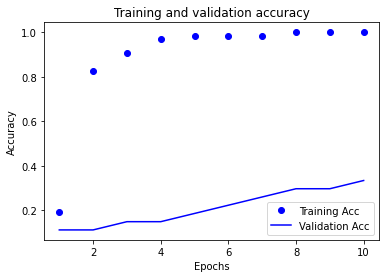

In [94]:
# Plotting Accuracy
# 정확도와 손실값의 변화를 보고, epoch를 어디에서 조절해야 할 지를 가늠한다.
# 정확도가 떨어지는 구간, 손실값이 높게 나타나는 구간을 확인한다
# 데이터가 큰 경우 대개 epoch를 늘려야 최적값에 도달한다
import matplotlib.pyplot as plt

# 정확도 그리기
plt.plot(epochs, acc, 'bo', label='Training Acc') #블루 동그라미
plt.plot(epochs, val_acc, 'b', label='Validation Acc') #블루 라인
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()            			

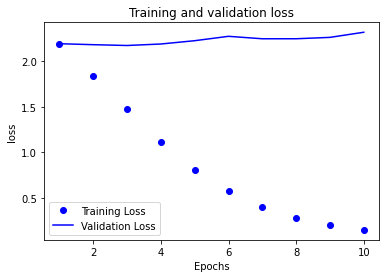

In [95]:
# Plotting Loss
plt.figure()            		# 새로운 그림을 그린다

# 손실값 그리기
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()            		

plt.show()

In [96]:
# Load Model
import os
from tensorflow.keras.models import load_model

filepath = '/content/gdrive/My Drive/pytest/'
os.chdir(filepath)
print("Current Directory:", os.getcwd())

loaded_model = load_model('text_multi_we_model.h5')
print("model loaded:", loaded_model)

with open('text_multi_we_tokenizer.pickle', 'rb') as handle:
       loaded_tokenizer = pickle.load(handle)

Current Directory: /content/gdrive/My Drive/pytest
model loaded: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f31fbdb3128>


In [97]:
# Test Data Loading
# 테스트 데이터의 텍스트와 라벨을 받아온다

texts, labels = make_texts_labels(test_dir, label_types)

print('texts 0:', texts[0])
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: ﻿나이 들어 아픈 허리 척추관협착증, 좁아진 신경통로 넓혀야 해결 가능

척추 내 신경이 지나가는 통로가 좁아지는 척추관협착증은 대표적인 퇴행성 척추 질환으로, 60대 이후 나이 들어서 생긴 허리 통증은 척추협착증일 확률이 상당히 높다. 나이가 들면 노화현상으로 인해 누구에게나 척추관이 좁아지는 증세가 찾아오기 때문이다. 건강보험심사평가원 통계에 따르면 척추관협착증 환자 수는 2014년 128만 3861명에서 2017년 154만 3477명으로 4년간 20% 이상 증가한 것으로 나타났다. 척추관협착증 환자들은 유독 다리의 통증을 호소한다. 걸을 때 다리가 터질 듯한 통증으로 가다 서다를 반복하거나 허리를 굽히거나 앉으면 통증이 줄어드는 증상이 있다면 척추관협착증일 수 있다.

부평힘찬병원 박진규 원장(신경외과 전문의)은 “척추관협착증은 척추 중앙의 척추관, 신경근관 또는 추간공이 좁아져 어느 부분이 협착되느냐에 따라 추간공협착증, 신경공협착증 등으로 세분화되기도 한다”며 “척추관이 연결된 목부터 꼬리뼈까지 어디에서든 발생할 수 있는데 대개 한 곳에서만 발생하기보다는 여러 곳에서 동시에 발생한다”고 설명했다.

척추관협착증은 허리를 구부릴 수 있는 척추 관절과 척추를 잡아주는 인대가 두꺼워지면서 신경관이 좁아져 다리로 가는 신경을 누르며 발생하는 질환이다. 초기 단계라면 선택적 주사요법, 물리치료와 운동치료 등을 통한 보존적 치료로 효과를 얻을 수 있다. 꽤 좁아진 경우에는 추간공 협착증 풍선확장술을 시행할 수도 있다. 국소 마취하에 척추의 꼬리뼈 쪽으로 풍선이 달린 가느다란 특수 카테터를 삽입, 카테터 관에 약물을 주입해 풍선을 부풀려 척추관을 넓히는 시술이다.

수술이 유일한 치료 방법일 경우도 있다. 통증이 심해 허리를 제대로 펴지 못하고, 5분 이상 걷기 힘들 때, 물리치료나 약물치료, 비수술 주사치료에도 더 이상 효과를 거둘 수 없을 때, 허리디스크와 동반되어 신경학적 결함이 뚜렷할 때 수술을 시행하게 된다. 수술은 척추관을 압박하는 요인

In [98]:
# 로딩된 tokenizer로 test 데이터를 Sequencing 한다
data = loaded_tokenizer.texts_to_sequences(texts) 	# 문자열을 숫자 리스트로 변환
x_test = pad_sequences(data, maxlen=maxlen)     	    # maxlen의 수만큼으로 2D 텐서를 만듦
print('data:', data)


# label에 해당하는 부분만 one-hot-encoding 한다.
# x_test = to_one_hot(data, dimension=max_words)
y_test = to_one_hot(labels, dimension=class_number)  #onehot 은 라벨부분만 거친다.

data: [[3041, 1400, 123, 381, 268, 1421, 2181, 3041, 482, 45, 53, 34, 1117, 161, 2484, 34, 234, 566, 34, 34, 1649, 2986, 229, 2185, 45, 2488, 53, 104, 45, 34, 53, 53, 3044, 2847, 2024, 68, 229, 1282, 2834, 1277, 85, 294, 30, 1891, 130, 130, 4074, 34, 4201, 1946, 1282, 53, 2024, 176, 185, 104, 7, 206, 259, 3, 5, 22], [247, 247, 696, 7, 247, 4805, 955, 190, 85, 4805, 1185, 1340, 1027, 4290, 30, 775, 34, 4809, 2434], [30, 30, 539, 42, 299, 1694, 2280, 564, 449, 30, 395, 42, 845, 3036, 1156, 74, 268, 1852, 1300, 845, 939, 1300, 72, 74, 35, 3036, 845, 371, 136, 395, 30, 1389, 45, 299, 185, 299, 795, 191, 7], [465, 106, 132, 1588, 1226, 14, 852, 1588, 241, 526, 526, 526, 21, 90, 5, 22], [1519, 4805, 1597, 803, 573, 34, 356, 234, 951, 4134, 195, 104, 7, 90, 5, 22], [2551, 3360, 1789, 4134, 3360, 14, 3360, 2418, 82, 800, 1243, 1852, 385, 1789, 4134, 1852, 449, 223, 4409, 381, 185, 3065, 50, 234, 51, 1029, 4120, 1852, 385, 131, 1680, 4134, 1597, 82, 2674, 106, 1540, 465, 3360, 130, 50, 34, 14, 

In [99]:
# Test Data Evaluation
test_eval = loaded_model.evaluate(x_test, y_test)
print('prediction model loss & acc:', test_eval)			# 44.4% 까지 나왔다

1/1 [==============================] - 0s 1ms/step - loss: 2.8703 - acc: 0.1111
prediction model loss & acc: [2.870342493057251, 0.1111111119389534]


In [100]:
predictions = loaded_model.predict(x_test)
print('predictions shape:', predictions.shape)
print('prediction 0 shape:', predictions[0].shape)
print('prediction 0 sum', np.sum(predictions[0]))             # 모든 분류에 대한 확률의 총합은 1이 되어야 한다

print('prediction 0 value:', predictions[0])                  # 9개 분류 각각에 대한 확률값
print('prediction 0 max value:', np.argmax(predictions[0]))  	# prediction 0이 가지고 있는 가장 큰 값의 판정 결과
print('prediction 1 max value:', np.argmax(predictions[1]))   # prediction 1이 가지고 있는 가장 큰 값의 판정 결과
print('prediction 2 max value:', np.argmax(predictions[2]))   # prediction 2가 가지고 있는 가장 큰 값의 판정 결과

predictions shape: (27, 9)
prediction 0 shape: (9,)
prediction 0 sum 1.0
prediction 0 value: [0.00768737 0.09986811 0.06467499 0.01800469 0.02806892 0.4491353
 0.2020245  0.11139943 0.0191367 ]
prediction 0 max value: 5
prediction 1 max value: 5
prediction 2 max value: 5


In [105]:
# 1개 데이터 예측
text = ["저는 독서를 좋아합니다."]       	# list 타입으로 만든다

text=[rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in text]
print('형태소 분석 결과:', text)

data = loaded_tokenizer.texts_to_sequences(text)
x_test = pad_sequences(data, maxlen=maxlen)

predictions = loaded_model.predict(x_test)
print("Result:", predictions)                           # 각 분류에 대한 확률을 보여준다
print("분류 결과:", np.argmax(predictions[0]))         	# 가장 큰 확률값을 가진 분류 제시. 0~8 숫자 중 하나

형태소 분석 결과: [['저', '독서', '좋아하']]
Result: [[0.00550858 0.08912539 0.04083333 0.02055561 0.02224828 0.4710986
  0.14085147 0.19417225 0.01560648]]
분류 결과: 5
